#### [ 이미지 변환 - 크기 변경 ]
- 이미지 전처리 시 필수
- 수집된 이미지 크기가 모두 달라서 동일 크기를 맞추는 작업

[1] 모듈 로딩 및 데이터 준비 <hr>

In [29]:
## [1-1] 모듈 로딩
import cv2							# 컴퓨터버전 모듈
import numpy as np					# 이미지 데이터 저장 모듈
import matplotlib.pyplot as plt		# 시각화 모듈
import os							# 파일, 폴더, 경로 관련 모듈

In [30]:
## [1-2] 데이터 준비
IMG_DIR = '../data/image/'
FILENAME = 'orange.png'

[2] 이미지 로딩 <hr>

In [31]:
## 로딩 : 경로+파일명
colorIMG=cv2.imread(IMG_DIR+FILENAME, cv2.IMREAD_COLOR)

In [32]:
## 정보확인
if colorIMG is None:
	print(f"{colorIMG}: 이미지 체크")
else:
	print(f'{FILENAME}')
	print(f'형태:{colorIMG.shape}	차원:{colorIMG.ndim}D')

## 이미지 형태 : (행, 열, 채널)

orange.png
형태:(393, 732, 3)	차원:3D


[3] 이미지 크기 조정 <hr>

In [33]:
## [3-1] 이미지 축소 => 보간법 : cv2.INTER_AREA
##			이미지데이터, (축소w, h)
downIMG=cv2.resize(colorIMG, (100, 100), interpolation=cv2.INTER_AREA)

print(f'형태:{downIMG.shape}	차원:{downIMG.ndim}D')

형태:(100, 100, 3)	차원:3D


In [34]:
## [3-2] 이미지 확대 => 보간법 : cv2.INTER_LINEAR, cv2.INTER_CUBIC
##			이미지데이터, (확대대w, h)
upIMG=cv2.resize(colorIMG, (320, 320), interpolation=cv2.INTER_LINEAR)

print(f'{colorIMG.shape} ==> 형태:{upIMG.shape}	차원:{upIMG.ndim}D')

(393, 732, 3) ==> 형태:(320, 320, 3)	차원:3D


In [35]:
## [3-3] 축소, 원본, 확대 이미지 출력
cv2.imshow('[SMALL]', downIMG)
cv2.imshow('[ORIGINAL]', colorIMG)
cv2.imshow('[BIG]', upIMG)

## 이벤트 처리
cv2.waitKey()	# 무한대기
cv2.destroyAllWindows()

[4] OpenCV => matplotlib 출력 <hr>

In [36]:
## 시각화 기능 함수
def drawImage(row, col, imgList):
	fig, axes = plt.subplots(row, col)
	axes = axes.flatten() if col >= 2 else [axes]

	for ax, img in zip(axes, imgList):
		ax.imshow(img)
		ax.set_title(f'{img.shape}')

	plt.tight_layout() # 보기 좋게 행과 열의 간격 띄우기
	plt.show()

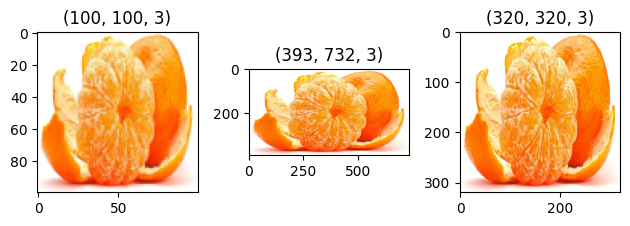

In [37]:
## -----------------------------------------------------
## - opencv 채널 순서 BGR ===> 일반 채널 순서 RGB 변환
##   * cv2.cvtColor(이미지데이터, 변형 형식)
##   * BGR ==> RGB : cv2.COLOR_BGR2RGB
## -----------------------------------------------------
downIMG2  = cv2.cvtColor(downIMG, cv2.COLOR_BGR2RGB)
colorIMG2 = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2RGB)
upIMG2    = cv2.cvtColor(upIMG, cv2.COLOR_BGR2RGB)

## ------------------------------------------------------
## 시각화
## ------------------------------------------------------
drawImage(1, 3, [downIMG2, colorIMG2, upIMG2])

[5] 상대적 크기 이미지 축소/확대 <hr>

In [38]:
## [5-0] 현재이미지 크기
H, W, _ = colorIMG.shape

print(f'현재 이미지 H : {H}, W : {W}')

현재 이미지 H : 393, W : 732


In [39]:
## [5-1] 이미지 축소 => 보간법 : cv2.INTER_AREA
##			이미지데이터, (0, 0),fx=값<1.0, fy=값<1.0
downIMG=cv2.resize(colorIMG, dsize=(0, 0), fx=0.2, fy=0.2, interpolation=cv2.INTER_CUBIC)

print(f'형태:{downIMG.shape}	차원:{downIMG.ndim}D')

형태:(79, 146, 3)	차원:3D


In [40]:
## [5-2] 이미지 축소 => 보간법 : cv2.INTER_LINEAR, cv2.INTER_CUBIC
##			이미지데이터, (0, 0),fx=값>1.0, fy=값>1.0
upIMG=cv2.resize(colorIMG, dsize=(0, 0), fx=1.5, fy=1.2, interpolation=cv2.INTER_CUBIC)

print(f'형태:{upIMG.shape}	차원:{upIMG.ndim}D')

형태:(472, 1098, 3)	차원:3D


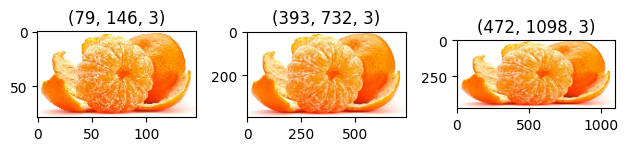

In [41]:
## -----------------------------------------------------
## - opencv 채널 순서 BGR ===> 일반 채널 순서 RGB 변환
##   * cv2.cvtColor(이미지데이터, 변형 형식)
##   * BGR ==> RGB : cv2.COLOR_BGR2RGB
## -----------------------------------------------------
downIMG2  = cv2.cvtColor(downIMG, cv2.COLOR_BGR2RGB)
colorIMG2 = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2RGB)
upIMG2    = cv2.cvtColor(upIMG, cv2.COLOR_BGR2RGB)

## ------------------------------------------------------
## 시각화
## ------------------------------------------------------
drawImage(1, 3, [downIMG2, colorIMG2, upIMG2])